<a href="https://colab.research.google.com/github/Angelespinosa10/git/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

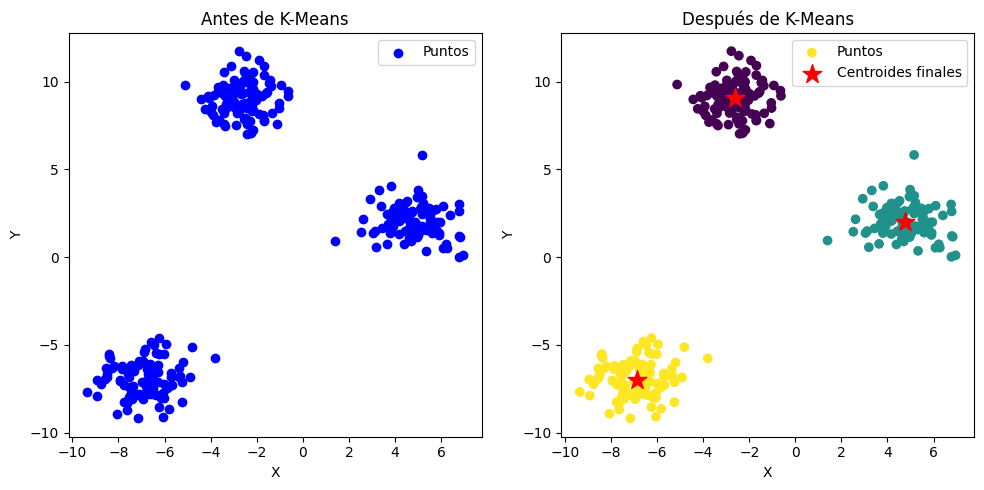

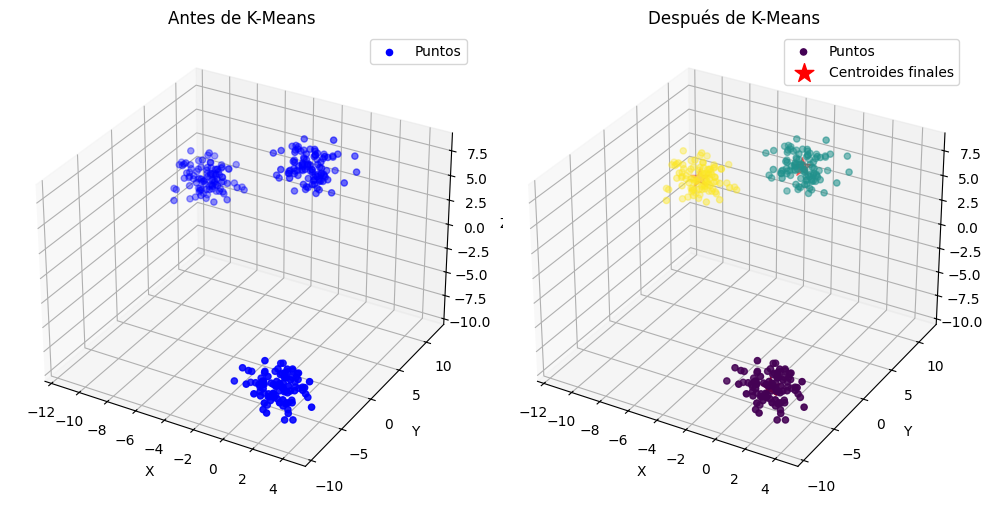

In [47]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la clase corregida de KMeans
class KMeans:
    def __init__(self, k=3, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None

    def distancia_euclideana(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        diff = point1 - point2
        inv_cov = np.linalg.inv(covariance_matrix)
        return np.sqrt(diff @ inv_cov @ diff.T)

    def calcular_centroides(self, points, labels):
        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

# Definir funciones de visualización
def dibujar2D(points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de K-Means')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Después de K-Means')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Generar datos sintéticos en 2D
num_samples = 300
num_features = 2
num_clusters = 3

from sklearn.datasets import make_blobs

points_2D, _ = make_blobs(n_samples=num_samples, centers=num_clusters, n_features=num_features, random_state=42)

# Ejecutar K-Means con 3 clusters
kmeans = KMeans(k=num_clusters, max_iter=100)
labels_2D = kmeans.run(points_2D)
centroids_2D = kmeans.centroids

# Visualizar los resultados en 2D
dibujar2D(points_2D, centroids_2D, labels_2D)

# Definir la función de visualización en 3D
def dibujar3D(points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))

    # Antes de K-Means
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de K-Means')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()

    # Después de K-Means
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Después de K-Means')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Generar datos sintéticos en 3D
num_features_3D = 3
points_3D, _ = make_blobs(n_samples=num_samples, centers=num_clusters, n_features=num_features_3D, random_state=42)

# Ejecutar K-Means con 3 clusters en 3D
kmeans_3D = KMeans(k=num_clusters, max_iter=100)
labels_3D = kmeans_3D.run(points_3D)
centroids_3D = kmeans_3D.centroids

# Visualizar los resultados en 3D
dibujar3D(points_3D, centroids_3D, labels_3D)



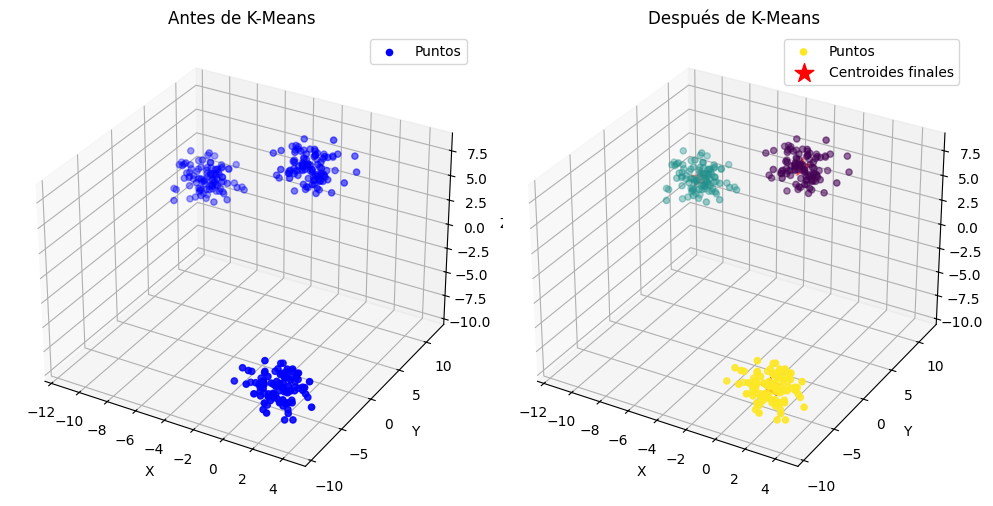

In [22]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia euclideana
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

NameError: name 'np' is not defined

In [24]:
dibujar2D(points, kmeans.centroids, labels)

NameError: name 'points' is not defined

In [ ]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia de Manhattan
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points, tipo_distance="mahalanobis")
print(labels)
print(kmeans.centroids)

[0 0 0 1 0 1]
[[2.125 3.1  ]
 [8.5   9.5  ]]


In [25]:
dibujar2D(points, kmeans.centroids, labels)

NameError: name 'points' is not defined

In [ ]:
# Ejemplo de uso (datos con 3 caracteristicas)
points = np.array([[1, 2, 0], [1.5, 1.8, 6], [-1, 5, 8], [3.2, 8, 8], [3, 1, 0.6], [-8, 9, 11]])
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[2 0 0 0 2 1]
[[ 1.23333333  4.93333333  7.33333333]
 [-8.          9.         11.        ]
 [ 2.          1.5         0.3       ]]


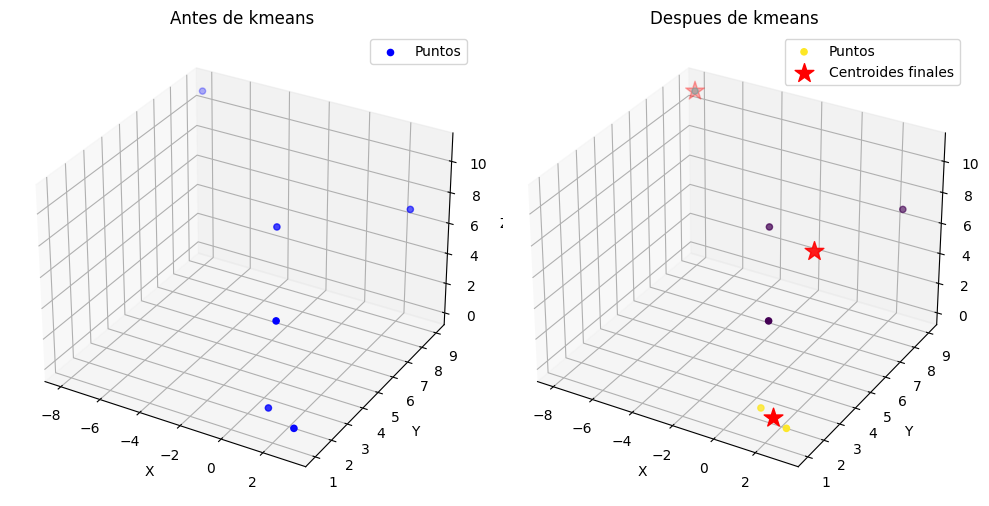

In [ ]:
dibujar3D(points, kmeans.centroids, labels)

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 500,n_features = 2,centers = 4,random_state = 23)

In [ ]:
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[1 0 0 1 0 1 2 0 2 2 2 2 0 0 0 0 1 2 2 0 2 0 2 0 0 0 2 0 2 1 2 2 2 2 1 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 0 1 1 0 1 0 0 0 0 1 2 0 0 2 1 0 0 0 0 0 2 0 0 0
 2 1 1 0 0 2 0 2 0 2 0 1 0 0 1 2 0 1 2 2 0 2 1 0 0 0 0 2 0 0 0 1 1 0 1 0 0
 2 0 0 0 2 2 1 2 0 1 0 0 1 0 0 2 0 0 1 1 2 0 0 0 1 1 1 1 0 2 0 1 1 0 2 0 0
 0 0 0 2 0 0 2 1 2 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 2 0 0 0 2 0 1 0 1 1
 0 2 1 1 2 2 1 2 0 2 1 0 0 1 0 2 0 0 0 2 0 0 1 0 0 2 0 0 0 1 2 0 0 2 0 1 0
 1 0 2 1 0 1 2 1 0 0 0 0 0 2 0 1 0 0 0 0 2 0 0 2 2 1 0 0 0 0 1 0 1 0 1 0 2
 2 2 0 0 1 0 1 0 1 2 2 0 0 2 1 2 1 1 0 1 2 0 1 0 2 2 1 1 0 0 1 0 0 2 2 0 2
 0 1 2 0 1 0 0 2 1 0 2 0 1 0 2 1 0 0 0 1 1 0 1 2 0 0 0 0 0 2 1 0 1 0 0 0 0
 2 1 2 2 0 2 0 0 0 2 0 0 1 1 1 0 0 0 1 1 2 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1
 2 0 1 0 2 2 0 1 1 0 2 2 0 1 0 2 2 0 0 0 0 2 2 2 0 0 2 1 0 1 0 0 0 1 2 0 1
 0 0 0 2 2 0 0 1 2 2 2 0 0 2 1 2 1 0 2 1 0 0 1 0 2 0 1 2 2 0 0 2 1 1 0 1 0
 2 2 0 1 1 2 0 2 2 0 2 0 1 1 1 0 1 0 0 0 2 2 1 0 0 0 2 2 1 2 1 2 0 0 2 0 0
 0 0 1 1 2 0 1 0 0 0 2 1 

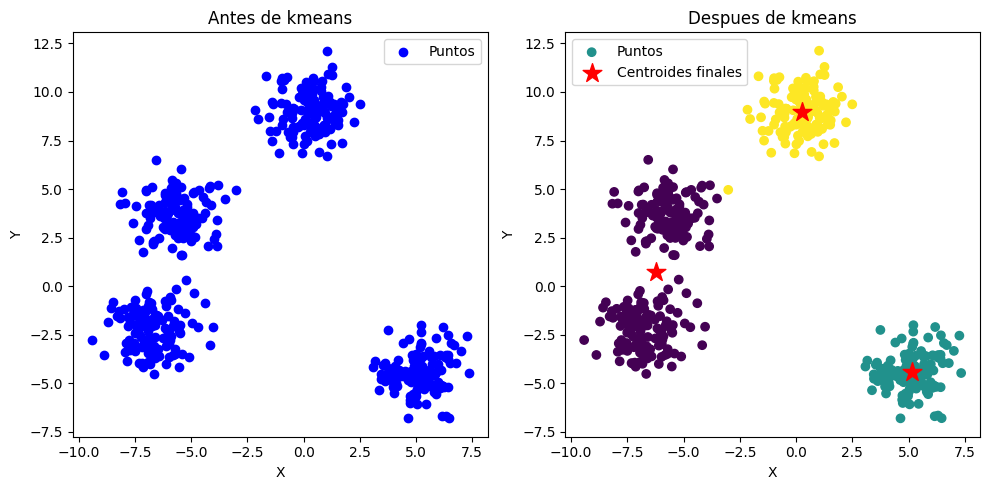

In [ ]:
dibujar2D(points, kmeans.centroids, labels)